## PA- 7.2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
X,y = iris.data, iris.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
svc = SVC(kernel='rbf', C=20, gamma='auto')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
mms= MinMaxScaler()
svc2 = SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None)
pipe1 = Pipeline(steps= [('Scaler',mms), ('svc', svc2)])
pipe1.fit(X_train,y_train)
y_pred2 = pipe1.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
np.unique(y)

array([0, 1, 2])

In [ ]:
X_temp = np.hstack((X,y.reshape(-1,1)))

In [ ]:
 data=pd.DataFrame(X_temp)
data.drop(data[data[4]==2].index, inplace=True)

In [ ]:
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y, test_size=0.5, random_state=0)
mms= MinMaxScaler()
svc3 = SVC()
pipe2 = Pipeline(steps= [('Scaler',mms), ('svc', svc3)])
pipe2.fit(X_train2,y_train2)
y_pred3 = pipe2.predict(X_test2)
print(recall_score(y_test2,y_pred3, average=None))

[1.    1.    0.875]


In [ ]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y, test_size=0.3, random_state=42)
svc4 = LinearSVC(random_state=42, penalty='l2', loss='hinge')
svc4.fit(X_train3,y_train3)
y_pred4 = svc4.predict(X_test3)
print(classification_report(y_test3,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
X_train5,X_test5,y_train5,y_test5=train_test_split(X,y, test_size=0.3, random_state=42)
svc5 = SVC(kernel='rbf', C=1, gamma='auto')
param_grid = {'kernel':['linear', 'rbf'], 'C':[5, 10, 100]}
gscv2= GridSearchCV(svc5, param_grid=param_grid, cv=10)

In [ ]:
gscv2.best_estimator_.fit(X_train5, y_train5)

SVC(C=5, gamma='auto', kernel='linear')

In [ ]:
y_pred5 = gscv2.best_estimator_.predict(X_test5)
print(classification_report(y_test5,y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## GA-7 Part-B

In [ ]:
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y, test_size=0.3, random_state=0)
svc6 = SVC(kernel='linear', C=1, gamma = 'auto')
param_grid={'kernel':['linear' , 'rbf'], 'C':[1,15,25]}
gscv6 = GridSearchCV(svc6, param_grid=param_grid, cv=4)
gscv6.fit(X_train6,y_train6)

GridSearchCV(cv=4, estimator=SVC(C=1, gamma='auto', kernel='linear'),
             param_grid={'C': [1, 15, 25], 'kernel': ['linear', 'rbf']})

In [ ]:
print(gscv6.best_score_)

0.9807692307692308


In [ ]:
X_s=pd.read_csv('/Social_Network_Ads.csv')
X_s

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
X_soc,y_soc = X_s.iloc[:,:-1], X_s.iloc[:,-1]
print(X_soc,y_soc)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns] 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [ ]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_soc,y_soc, test_size=0.25, random_state=0)
type(X_train7)

pandas.core.frame.DataFrame

In [ ]:
ss7 = StandardScaler()
ls7 = SVC(kernel='linear', random_state=0)
pipe7 = Pipeline(steps=[('ss7',ss7),('ls7',ls7)])
pipe7.fit(X_train7, y_train7)
y_pred7 = pipe7.predict(X_test7)
print(classification_report(y_test7, y_pred7))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



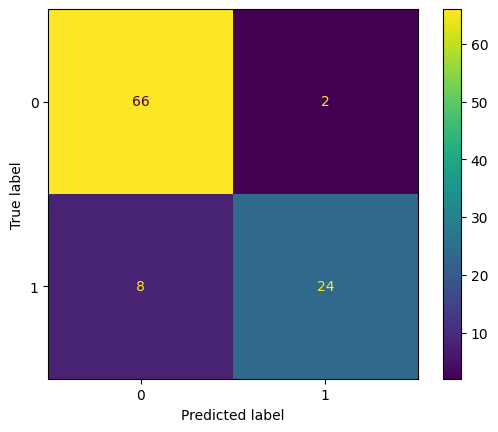

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test7, y_pred7))

In [ ]:
X_m,y_m=fetch_openml('mnist_784', version=1, return_X_y=True)
type(X_m)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


pandas.core.frame.DataFrame

In [ ]:
X_train8, y_train8 = X_m.iloc[:20000,:], y_m.iloc[:20000]
X_test8, y_test8 = X_m.iloc[20000:25000,:], y_m.iloc[20000:25000]

In [ ]:
mms8 = MinMaxScaler()
svc8 = SVC(kernel='linear', decision_function_shape='ovr', class_weight=None)
pipe8 = Pipeline([('mms8',mms8),('svc8',svc8)])
pipe8.fit(X_train8,y_train8)
y_pred8 = pipe8.predict(X_test8)
print(classification_report(y_test8,y_pred8))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       478
           1       0.95      0.98      0.97       568
           2       0.92      0.92      0.92       521
           3       0.91      0.90      0.90       516
           4       0.91      0.94      0.92       500
           5       0.88      0.88      0.88       460
           6       0.97      0.96      0.96       491
           7       0.91      0.96      0.94       504
           8       0.93      0.85      0.89       466
           9       0.92      0.88      0.90       496

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



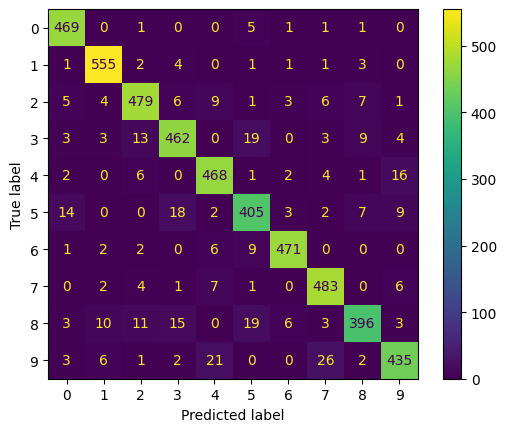

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test8, y_pred8)